### Advanced Regression Practice 
### Housing Price Prediction


In [51]:
# imports
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from col_mappings import mappings

from scipy.stats import norm

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [40]:
cwd = os.getcwd()

file_path = os.path.join(cwd, "data", "train.csv")
train_df = pd.read_csv(file_path)

df = train_df.copy()

# Fill Alley NAs with "NA"
df["Alley"] = df["Alley"].fillna("No Fence")

# Replace LotFrontage NAs with 0 
df["LotFrontage"] = df["LotFrontage"].fillna(0)

# MasVnrType 
df["MasVnrType"] = df["MasVnrType"].fillna("None")

# MasVnrArea Fill 0 
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

# No Basement fill 
basement_cols = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]

for col in basement_cols: 
    df[col] = df[col].fillna("No Basement")

# Fireplace 
df["FireplaceQu"] = df["FireplaceQu"].fillna("No Fireplace")

# GarageType
garage_cols = ["GarageType", "GarageFinish", "GarageQual", "GarageCond", "GarageYrBlt"]
for col in garage_cols: 
    if col == "GarageYrBlt": 
        df[col] = df[col].fillna(df["YearBuilt"]) # replace with the year that the house was built
        
    df[col] = df[col].fillna("No Garage")

# Drop PoolQC
df = df.drop("PoolQC", axis = 1)

# Fence
df["Fence"] = df["Fence"].fillna("No Fence")

# MiscFeature
df["MiscFeature"] = df["MiscFeature"].fillna("None")

# Convert MSSubClass to their Character Values
df["MSSubClass"] = df["MSSubClass"].map(mappings["MSSubClass"])

# Ordinal Vars to Cat 
ordinal_vars = ["OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold"]

for col in ordinal_vars: 
    df[col] = df[col].astype("category")


df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,No Fence,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Fence,None,0,2,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,No Fence,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Fence,None,0,5,2007,WD,Normal,181500
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,No Fence,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Fence,None,0,9,2008,WD,Normal,223500
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,No Fence,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Fence,None,0,2,2006,WD,Abnorml,140000
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,No Fence,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Fence,None,0,12,2008,WD,Normal,250000


In [42]:
for col in df.select_dtypes(include = "object").columns: 
    df[col] = df[col].astype("category")

#### EDA

/opt/homebrew/lib/python3.11/site-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


AttributeError: Rectangle.set() got an unexpected keyword argument 'fit'

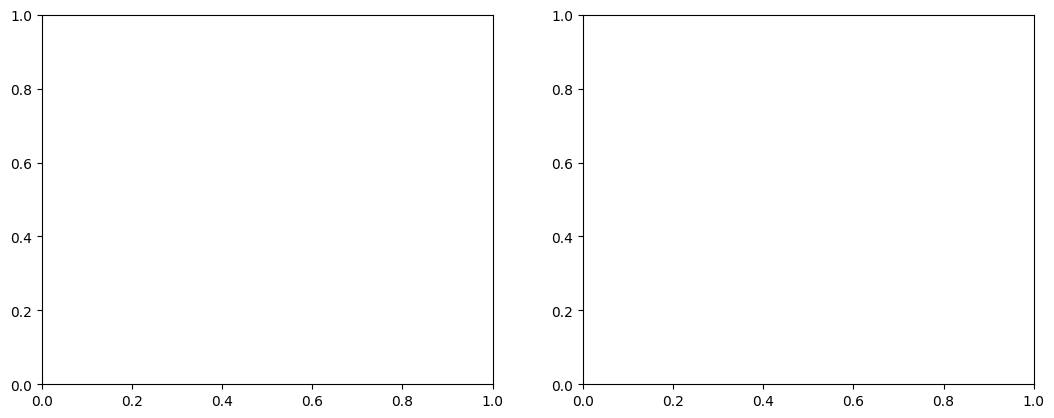

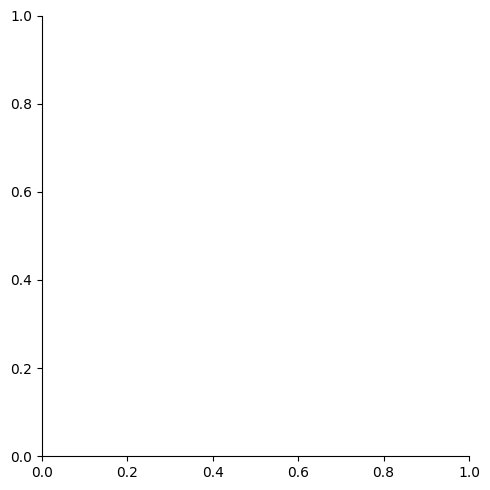

In [53]:
fig, ax = plt.subplots(1,2)
width, height = fig.get_size_inches()
fig.set_size_inches(width*2, height)
sns.displot(df['SalePrice'], ax=ax[0], fit=norm)
sns.displot(np.log(df[('SalePrice')]+1), ax=ax[1], fit= norm)